In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
%matplotlib

Using matplotlib backend: Qt5Agg


**A value of the RCA above one in goods (or sector) k for country i means that i has a revealed comparative advantage in that sector. a measure of a country’s relative advantage or disadvantage in a specific industry as evidenced by trade flows.**

## Load Dataset

In [2]:
rca = pd.read_csv("core dataset.csv")
rca.head()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


In [3]:
del rca["Unnamed: 0"]
rca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 9 columns):
hs07               2880 non-null float64
year               2880 non-null int64
export_val         2880 non-null float64
import_val         2880 non-null float64
export_rca         2880 non-null float64
import_rca         2880 non-null float64
export_val_perc    2880 non-null float64
import_val_perc    2880 non-null float64
country            2880 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 202.6+ KB


In [4]:
rca["country"].nunique()

3

In [5]:
rca.describe()

,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc
count,2880.000000,2880.00000,2.880000e+03,2.880000e+03,2880.000000,2880.000000,2.880000e+03,2880.000000
mean,48.708333,2012.50000,5.623704e+10,5.611821e+10,1617.972744,1221.682831,1.041667e-02,0.010417
std,28.003343,2.87278,2.560536e+11,2.560603e+11,4888.834240,2415.514842,3.026551e-02,0.027087
min,1.000000,2008.00000,5.329027e+04,4.707142e+05,0.002770,0.022146,3.351128e-07,0.000003
25%,24.750000,2010.00000,1.219131e+08,2.331184e+08,4.259250,6.347500,5.038395e-04,0.000958
50%,48.500000,2012.50000,1.036734e+09,1.160687e+09,16.133000,21.703000,2.412964e-03,0.003045
75%,72.250000,2015.00000,2.104188e+10,2.095033e+10,1294.419250,1510.220000,7.269803e-03,0.008224
max,97.000000,2017.00000,3.480827e+12,3.480827e+12,69917.199000,17398.917000,4.343699e-01,0.314280


## Remove all useless and wrong features

In [6]:
rca.columns

Index(['hs07', 'year', 'export_val', 'import_val', 'export_rca', 'import_rca',
       'export_val_perc', 'import_val_perc', 'country'],
      dtype='object')

In [7]:
del rca["export_rca"], rca["import_rca"]
rca.head()

,hs07,year,export_val,import_val,export_val_perc,import_val_perc,country
0,1.0,2008,6.343198e+07,358611772.0,0.000489,0.003636,indonesia
1,2.0,2008,3.252633e+07,238646027.0,0.000251,0.002420,indonesia
2,3.0,2008,2.238172e+09,98839096.0,0.017256,0.001002,indonesia
3,4.0,2008,4.052109e+08,859054164.0,0.003124,0.008710,indonesia
4,5.0,2008,2.466984e+07,49579023.0,0.000190,0.000503,indonesia


In [8]:
vietnam = rca.loc[rca["country"]=="vietnam"]
vietnam = vietnam.reset_index()
vietnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
index              960 non-null int64
hs07               960 non-null float64
year               960 non-null int64
export_val         960 non-null float64
import_val         960 non-null float64
export_val_perc    960 non-null float64
import_val_perc    960 non-null float64
country            960 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 60.1+ KB


In [9]:
vietnam.tail()

,index,hs07,year,export_val,import_val,export_val_perc,import_val_perc,country
955,1915,93.0,2017,8.709500e+04,1.891823e+07,4.060296e-07,0.000094,vietnam
956,1916,94.0,2017,8.462657e+09,1.264328e+09,3.945219e-02,0.006257,vietnam
957,1917,95.0,2017,1.807360e+09,5.063306e+08,8.425758e-03,0.002506,vietnam
958,1918,96.0,2017,4.294399e+08,7.398881e+08,2.002013e-03,0.003661,vietnam
959,1919,97.0,2017,2.622439e+06,1.968601e+06,1.222559e-05,0.000010,vietnam


In [10]:
dunia = rca.loc[rca["country"]=="ALL"]
dunia.rename(columns={"year":"year1","hs07": "hs07_du", "export_val_perc":"export_val_perc_du", "import_val_perc":"import_val_perc_du"}, inplace=True)
dunia = dunia.reset_index()
dunia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
index                 960 non-null int64
hs07_du               960 non-null float64
year1                 960 non-null int64
export_val            960 non-null float64
import_val            960 non-null float64
export_val_perc_du    960 non-null float64
import_val_perc_du    960 non-null float64
country               960 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 60.1+ KB


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
dunia.tail()

,index,hs07_du,year1,export_val,import_val,export_val_perc_du,import_val_perc_du,country
955,2875,93.0,2017,9.222621e+09,9.222621e+09,0.000577,0.000577,ALL
956,2876,94.0,2017,2.312774e+11,2.312774e+11,0.014466,0.014466,ALL
957,2877,95.0,2017,1.161837e+11,1.161837e+11,0.007267,0.007267,ALL
958,2878,96.0,2017,3.202722e+10,3.202722e+10,0.002003,0.002003,ALL
959,2879,97.0,2017,1.908515e+10,1.908515e+10,0.001194,0.001194,ALL


In [12]:
oi = pd.concat([vietnam, dunia], axis=1)
oi.head()

,index,hs07,year,export_val,import_val,export_val_perc,import_val_perc,country,index,hs07_du,year1,export_val,import_val,export_val_perc_du,import_val_perc_du,country
0,960,1.0,2008,1.655721e+07,1.116937e+07,0.000242,0.000146,vietnam,1920,1.0,2008,1.706110e+10,1.706110e+10,0.001111,0.001111,ALL
1,961,2.0,2008,6.023379e+07,5.483150e+08,0.000879,0.007155,vietnam,1921,2.0,2008,9.630627e+10,9.630627e+10,0.006270,0.006270,ALL
2,962,3.0,2008,3.823832e+09,3.213780e+08,0.055833,0.004194,vietnam,1922,3.0,2008,7.751119e+10,7.751119e+10,0.005046,0.005046,ALL
3,963,4.0,2008,7.817152e+07,4.092630e+08,0.001141,0.005340,vietnam,1923,4.0,2008,7.160095e+10,7.160095e+10,0.004661,0.004661,ALL
4,964,5.0,2008,1.147554e+07,5.598978e+07,0.000168,0.000731,vietnam,1924,5.0,2008,7.225888e+09,7.225888e+09,0.000470,0.000470,ALL


In [13]:
oi.tail()

,index,hs07,year,export_val,import_val,export_val_perc,import_val_perc,country,index,hs07_du,year1,export_val,import_val,export_val_perc_du,import_val_perc_du,country
955,1915,93.0,2017,8.709500e+04,1.891823e+07,4.060296e-07,0.000094,vietnam,2875,93.0,2017,9.222621e+09,9.222621e+09,0.000577,0.000577,ALL
956,1916,94.0,2017,8.462657e+09,1.264328e+09,3.945219e-02,0.006257,vietnam,2876,94.0,2017,2.312774e+11,2.312774e+11,0.014466,0.014466,ALL
957,1917,95.0,2017,1.807360e+09,5.063306e+08,8.425758e-03,0.002506,vietnam,2877,95.0,2017,1.161837e+11,1.161837e+11,0.007267,0.007267,ALL
958,1918,96.0,2017,4.294399e+08,7.398881e+08,2.002013e-03,0.003661,vietnam,2878,96.0,2017,3.202722e+10,3.202722e+10,0.002003,0.002003,ALL
959,1919,97.0,2017,2.622439e+06,1.968601e+06,1.222559e-05,0.000010,vietnam,2879,97.0,2017,1.908515e+10,1.908515e+10,0.001194,0.001194,ALL


### Calculating RCA within HS07 Code

In [14]:
def coba(frame1):
    for z in frame1:
        frame1["rca_x"] = frame1["export_val_perc"] / frame1["export_val_perc_du"]
        frame1["rca_i"] = frame1["import_val_perc"] / frame1["import_val_perc_du"]
    return frame1

In [15]:
gehu = coba(oi)
gehu.tail()

,index,hs07,year,export_val,import_val,export_val_perc,import_val_perc,country,index,hs07_du,year1,export_val,import_val,export_val_perc_du,import_val_perc_du,country,rca_x,rca_i
955,1915,93.0,2017,8.709500e+04,1.891823e+07,4.060296e-07,0.000094,vietnam,2875,93.0,2017,9.222621e+09,9.222621e+09,0.000577,0.000577,ALL,0.000704,0.162293
956,1916,94.0,2017,8.462657e+09,1.264328e+09,3.945219e-02,0.006257,vietnam,2876,94.0,2017,2.312774e+11,2.312774e+11,0.014466,0.014466,ALL,2.727231,0.432514
957,1917,95.0,2017,1.807360e+09,5.063306e+08,8.425758e-03,0.002506,vietnam,2877,95.0,2017,1.161837e+11,1.161837e+11,0.007267,0.007267,ALL,1.159439,0.344797
958,1918,96.0,2017,4.294399e+08,7.398881e+08,2.002013e-03,0.003661,vietnam,2878,96.0,2017,3.202722e+10,3.202722e+10,0.002003,0.002003,ALL,0.999382,1.827767
959,1919,97.0,2017,2.622439e+06,1.968601e+06,1.222559e-05,0.000010,vietnam,2879,97.0,2017,1.908515e+10,1.908515e+10,0.001194,0.001194,ALL,0.010241,0.008161


In [16]:
clean_rca = gehu[['year','hs07', "rca_x", "rca_i"]].copy()
clean_rca.head()

,year,hs07,rca_x,rca_i
0,2008,1.0,0.217666,0.131224
1,2008,2.0,0.140280,1.141214
2,2008,3.0,11.064818,0.831081
3,2008,4.0,0.244872,1.145711
4,2008,5.0,0.356198,1.553134


## the RCA Graph by HS07 Code Over Year

In [17]:
clean_rca.to_csv("vietnam_clean_rca.csv")

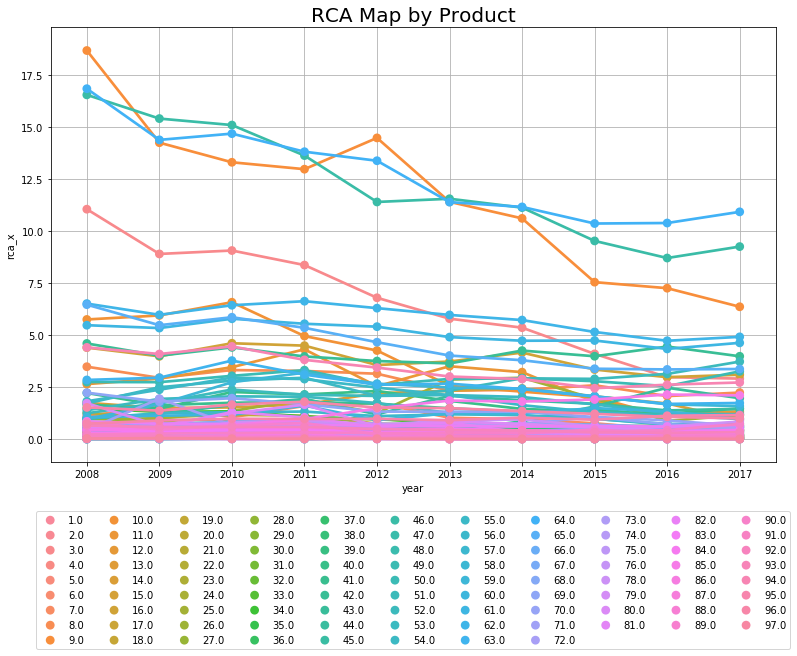

In [18]:
plt.figure(figsize=(13,8))
sns.pointplot(x="year", y="rca_x", hue="hs07", data=clean_rca, width=.1)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=11)
plt.grid(True)
plt.title("RCA Map by Product", size=20)
plt.show()

### Most Consistent to Be Highest and Lowest RCA Over Years

In [19]:
#search highest within a year
def  ayo(data, tahun):
    hijau = data.loc[data["year"]== tahun]
    hijau = hijau.set_index("hs07")
    hijau = hijau["rca_x"].nlargest(4)
    hijau = hijau.to_frame()
    hijau["year"] = tahun
    hijau = hijau.reset_index()
    return (hijau)

def  ayu(data, tahun):
    hijau = data.loc[data["year"]== tahun]
    hijau = hijau.set_index("hs07")
    hijau = hijau["rca_x"].nsmallest(1)
    hijau = hijau.to_frame()
    hijau["year"] = tahun
    hijau = hijau.reset_index()
    return (hijau)

In [20]:
w08 = ayo(clean_rca, 2008)
w09 = ayo(clean_rca, 2009)
w10 = ayo(clean_rca, 2010)
w11 = ayo(clean_rca, 2011)
w12 = ayo(clean_rca, 2012)
w13 = ayo(clean_rca, 2013)
w14 = ayo(clean_rca, 2014)
w15 = ayo(clean_rca, 2015)
w16 = ayo(clean_rca, 2016)
w17 = ayo(clean_rca, 2017)
u08 = ayu(clean_rca, 2008)
u09 = ayu(clean_rca, 2009)
u10 = ayu(clean_rca, 2010)
u11 = ayu(clean_rca, 2011)
u12 = ayu(clean_rca, 2012)
u13 = ayu(clean_rca, 2013)
u14 = ayu(clean_rca, 2014)
u15 = ayu(clean_rca, 2015)
u16 = ayu(clean_rca, 2016)
u17 = ayu(clean_rca, 2017)

In [21]:
iit = pd.concat([u08, u09, u10, u11, u12, u13, u14, u15, u16, u17, w08, w09, w10, w11, w12, w13, w14, w15, w16, w17], ignore_index=True)
iit.head()

,hs07,rca_x,year
0,47.0,0.000409,2008
1,47.0,0.002153,2009
2,75.0,0.001645,2010
3,75.0,0.002287,2011
4,75.0,0.006426,2012


In [22]:
print (iit["hs07"].unique())

[47. 75. 93.  9. 64. 46.  3. 62.]


In [23]:
ehu = clean_rca.set_index("hs07")
mostrca = ehu.loc[iit["hs07"].unique()]
mostrca = mostrca.reset_index()
mostrca.head()

,hs07,year,rca_x,rca_i
0,47.0,2008,0.000409,0.917098
1,47.0,2009,0.002153,0.948051
2,47.0,2010,0.036077,0.810146
3,47.0,2011,0.003282,0.721850
4,47.0,2012,0.054514,0.641346


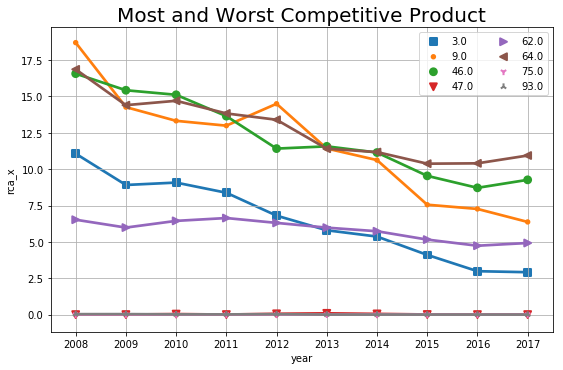

In [24]:
labe = mostrca["hs07"].unique()
mark = [",", ".", "o", "v", ">", "<", "1", "2", "3", "4"]
plt.figure(figsize=(9,5.6))
sns.pointplot(x="year", y="rca_x", hue="hs07", data=mostrca, markers= mark, dashes=False, legend=False)
plt.legend(loc=1, ncol=2)
plt.title("Most and Worst Competitive Product", size=20)
plt.grid(True)
plt.savefig("Vietnam RCA.png")
plt.show()

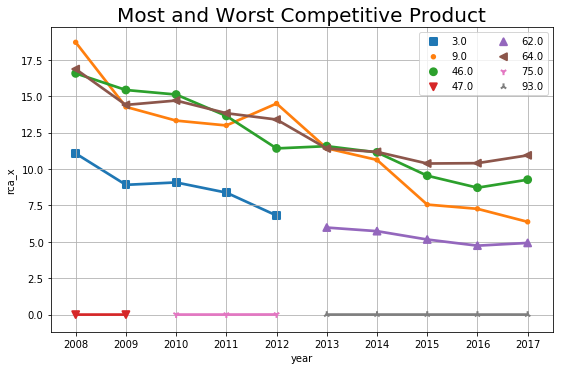

In [25]:
mark = [",", ".", "o", "v", "^", "<", "1", "2", "3", "4"]
plt.figure(figsize=(9,5.6))
sns.pointplot(x="year", y="rca_x", hue="hs07", data=iit, markers= mark, width=.1)
plt.legend(loc=1, ncol=2)
plt.grid(True)
plt.title("Most and Worst Competitive Product", size=20)
plt.savefig("RCA viet.png")
plt.show()